## Project date-a-scientist 


### 1. Description of project : 
In this project, we will analyze data from the online dating application OKCupid.
In recent years, there has been a massive increase in the use of dating apps to find love. 
Many of these apps use sophisticated data science techniques to recommend possible matches to users 
and optimize the user experience. These apps give us access to a wealth of information we never had before about how 
how different people experience romance.

### 2. Goal of project :
In this portfolio project, we will analyze some data from OKCupid, an application that focuses on using multiple choice and short answers to match users. We will perform these analyses using the skills we have learned so far, including machine learning skills.
We will use the information (variables) provided in the data to help us verify matches between users.

### 3.Data
The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### 4. Analysis: 
In this project we will use descriptive statistics to get an idea about the distribution of the data, but also a numerical summary of the data. We will use data visualization to see which variables are correlated and how each variable affects the correspondence between users of the site. Finally we will use supervised learning techniques, in this case classification algorithms, since the objective of the project is to make predictions about the user's astrological signs.



### Evaluation
The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores.

#### Importing python libraries

In [2]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\anaconda\lib\site-packages (0.11.1)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Data loading 

In [4]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


#### Data Characteristics

In [5]:
#Numbers of lines and columns
rows, columns = profiles.shape
print("Number of rows : {}".format(rows))
print("Number of columns : {}".format(columns))
print("\nGeneral information about the data :")
print("{}".format(profiles.info()))

Number of rows : 59946
Number of columns : 31

General information about the data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  heig

#### Data exploration


In this analysis we will start with the most important variable in my opinion, the astrological sign.

In [6]:
print("Number of values : {}".format(profiles.sign.nunique()))
print("{}".format(profiles.sign.unique()))

Number of values : 48
['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpio but it doesn&

The result for this column is far from what we expected. So the column needs to be cleaned up. 

In [7]:
profiles["clean_sign"] = profiles.sign.str.split().str.get(0)
print("Number of values after cleaning: {}".format(profiles.clean_sign.nunique()))
print("{}".format(profiles.clean_sign.unique()))
print("Proportion of values : ")
print("{}".format(profiles.clean_sign.value_counts(normalize = True)))

Number of values after cleaning: 12
['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']
Proportion of values : 
leo            0.089466
gemini         0.088157
libra          0.086050
cancer         0.086030
virgo          0.084700
taurus         0.084680
scorpio        0.084557
aries          0.081591
pisces         0.080712
sagittarius    0.080630
aquarius       0.080344
capricorn      0.073082
Name: clean_sign, dtype: float64


### Quantitative variables 

#### NB : We will use histograms to see the distribution of values.

#### Age : There is a high concentration of ages between 20 and 30 years.

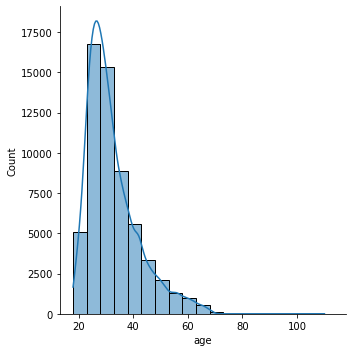

In [8]:
sns.displot(data=profiles, x="age", kind="hist", kde = "True", binwidth = 5)
plt.show()
#sns.__version__

Let's see how age changes by gender.
The graph shows a significant male presence relatively higher than the opposite sex.

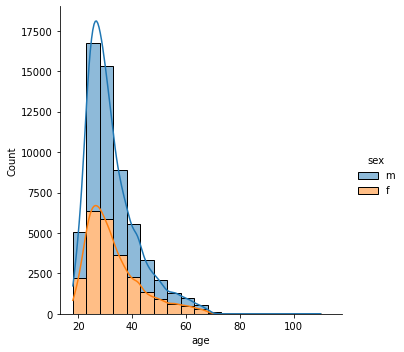

In [66]:
sns.displot(data=profiles, x="age", hue = "sex", kind="hist", binwidth = 5, multiple = "stack", kde = "True")
plt.savefig("age_by_sex.png")
plt.show()

#### Height : The next plot shows the height variable, most people look like they are between 5 feet tall and 6.5 feet tall.

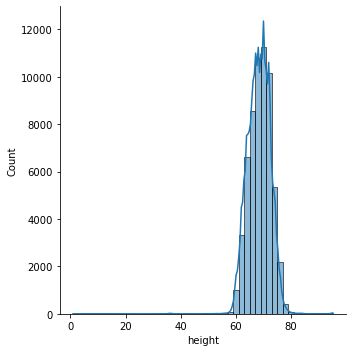

In [10]:
sns.displot(data=profiles, x="height",binwidth = 2, kind="hist", kde = "True")
plt.show()

Let's see how height changes by gender.
The graph shows a significant male presence relatively higher than the opposite sex.

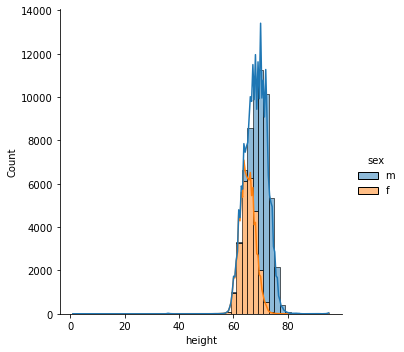

In [11]:
sns.displot(data=profiles, x="height",binwidth = 2, kind="hist", kde = "True", multiple = "stack", hue = "sex")
plt.show()

#### Income

The distribution of income is very low.

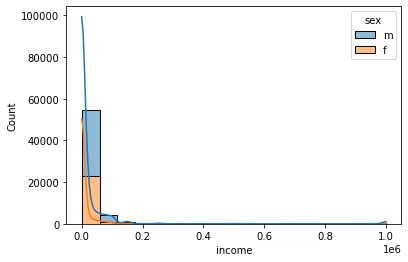

In [12]:
#sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack")
sns.histplot(data=profiles, x="income",hue="sex", bins = "auto", kde = "True",multiple = "stack");
plt.show()

#### Categorical variables

##### Graphical representation of some categorical variables.

#### Sex : This graph shows that there are more men than women on the site.

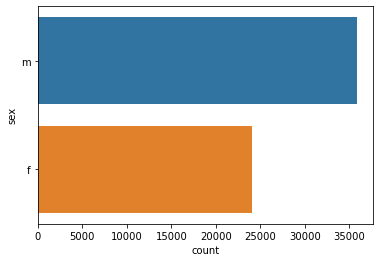

In [13]:
sns.countplot(data=profiles, y="sex")
plt.show()

#### Body types

#### Average, fit and athletic types are more representative than others.

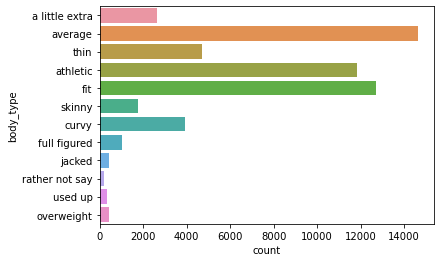

In [14]:
sns.countplot(y = "body_type", data = profiles)
plt.show()

#### By sex

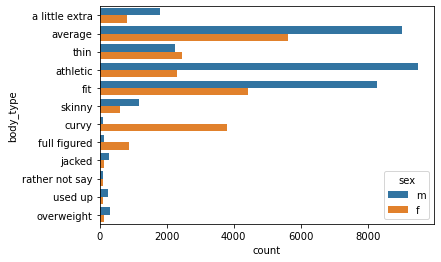

In [15]:
sns.countplot(y = "body_type", hue = "sex", data = profiles)
plt.show()

#### Diet

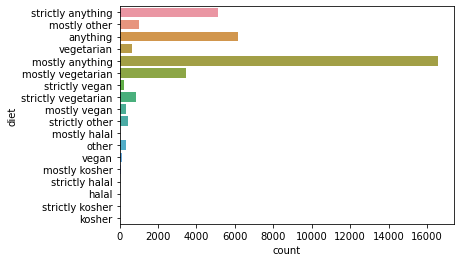

In [16]:
sns.countplot(y = "diet", data = profiles)
plt.show()

#### Drinks

The next plot shows that the majority of the users drink "socially", then "rarely" and "often".

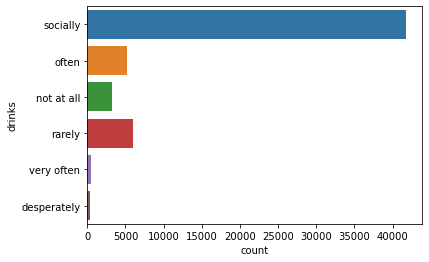

In [17]:
sns.countplot(y = "drinks", data = profiles)
plt.show()

#### Education 

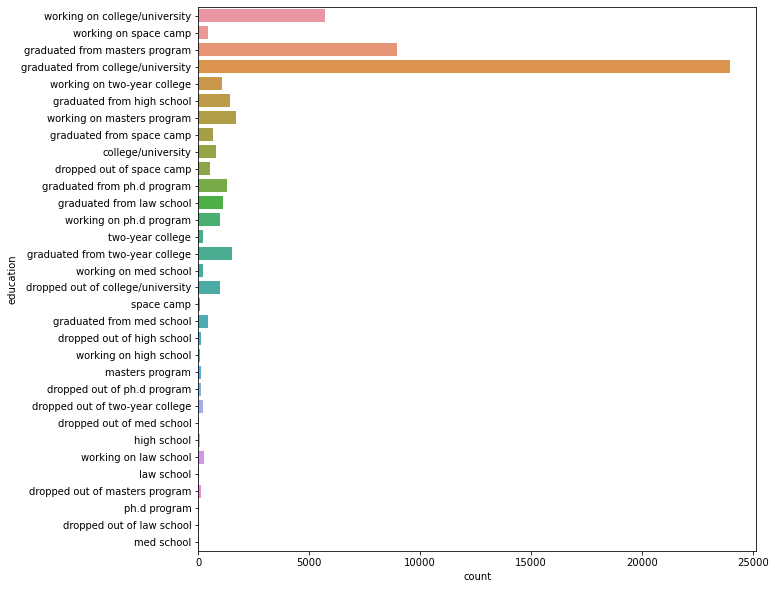

In [18]:
plt.figure(figsize = (10, 10))
sns.countplot(y = "education", data = profiles)
plt.show()

#### Jobs

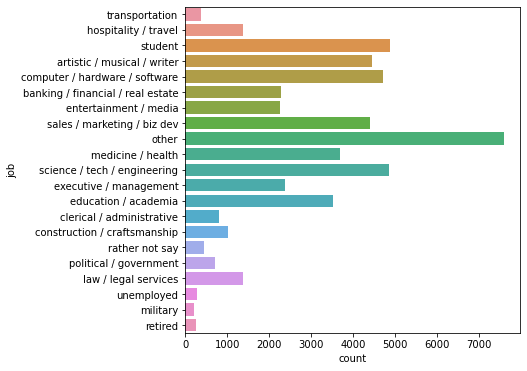

In [19]:
plt.figure(figsize = (6,6))
sns.countplot(y = "job", data = profiles)
plt.show()

#### Offspring

This graph shows that many users of this site do not have children.

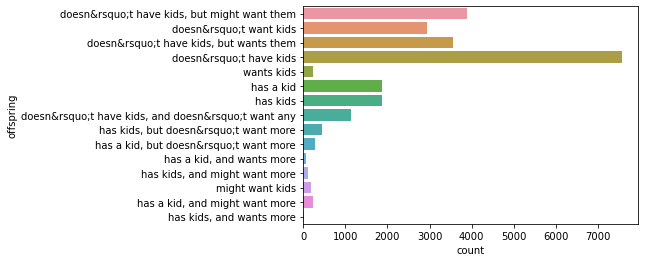

In [20]:
sns.countplot(data=profiles, y="offspring")
plt.show()

#### Orientation

The majority of users are straight.

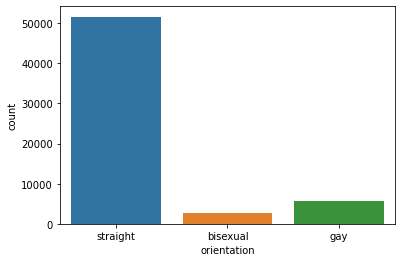

In [21]:
sns.countplot(x = "orientation", data = profiles)
plt.show()

#### By sex

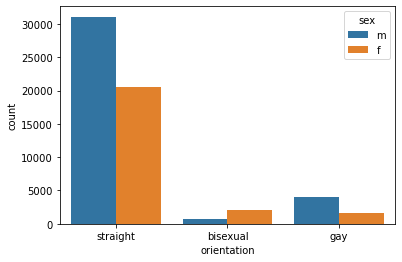

In [22]:
sns.countplot(x = "orientation", hue = "sex", data = profiles)
plt.show()

#### Pets

The chart shows that most users like or has dogs.

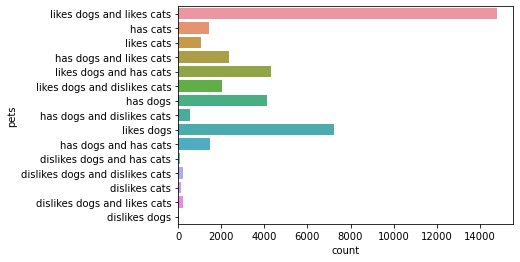

In [23]:
sns.countplot(y = "pets", data = profiles)
plt.show()

#### Religion

This column needs to be cleaned up, as this visualisation is not clear to the existing  religions.

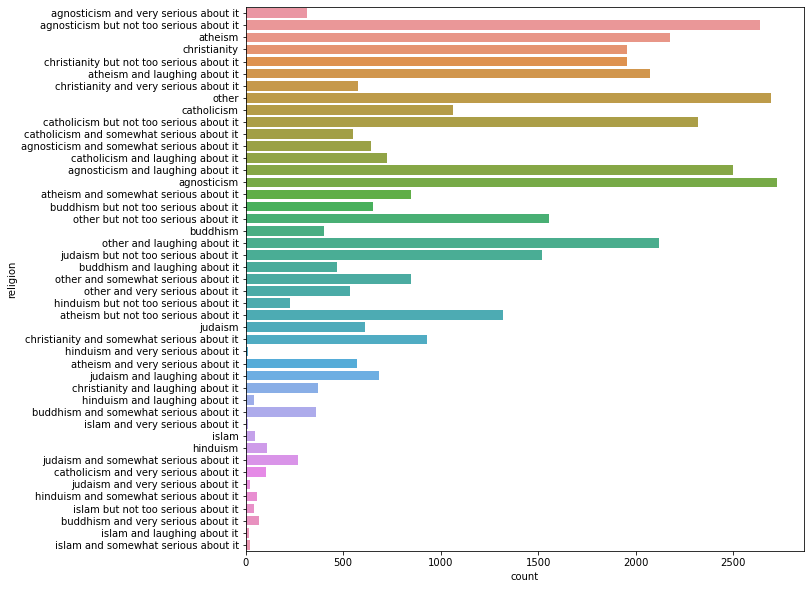

In [24]:
plt.figure(figsize = (10, 10))
sns.countplot(y = "religion", data = profiles)
plt.show()

In [25]:
profiles.religion.unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

In [26]:
profiles["religion_cleaned"] = profiles.religion.str.split().str.get(0)

In [27]:
profiles["religion_cleaned"]

0         agnosticism
1         agnosticism
2                 NaN
3                 NaN
4                 NaN
             ...     
59941     catholicism
59942     agnosticism
59943    christianity
59944     agnosticism
59945     catholicism
Name: religion_cleaned, Length: 59946, dtype: object

#### After cleaning up

Agnosticism is the most dominant religion

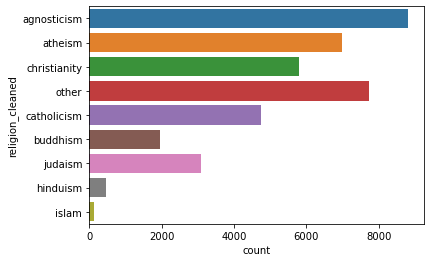

In [68]:
#plt.figure(figsize = (10, 10))
sns.countplot(data = profiles, y = "religion_cleaned")
plt.savefig("religion.png")
plt.show()

#### Signs

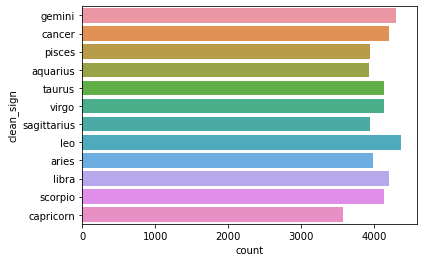

In [69]:
sns.countplot(data = profiles, y = "clean_sign")
plt.savefig("signs.png")
plt.show()

#### Smoking

The majority of users chose "no" for smoking.

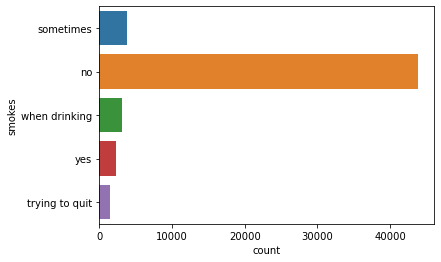

In [30]:
sns.countplot(y = "smokes", data = profiles)
plt.show()

#### Status

It is clear that most people who use a dating site are single. The graph below corroborates this fact.

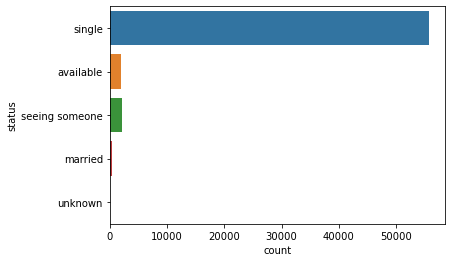

In [70]:
sns.countplot(y="status", data = profiles)
plt.savefig("status.png")
plt.show()

### Preprocess Data

#### Missing Data

Missing data is often not handled by machine learning algorithms well and have to be checked so they may need to be imputed or removed. It seems that many of the columns do have missing values. 

In [32]:
profiles.isnull().sum()

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
clean_sign          11056
religion_cleaned    20226
dtype: int64

#### Preprocessing 
Pre-processing consists of cleaning the data in order to make it usable by the machine learning algorithms

In this project, we will only use those variables that we think are good for our prediction. This decision can be discussed.

#### This code deletes the lines with na values.

In [33]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religion_cleaned',
       'sex', 'job', 'clean_sign']
df = profiles[cols].dropna()
df.shape

(16453, 8)

In [34]:
df.head()

,body_type,diet,orientation,pets,religion_cleaned,sex,job,clean_sign
0,a little extra,strictly anything,straight,likes dogs and likes cats,agnosticism,m,transportation,gemini
1,average,mostly other,straight,likes dogs and likes cats,agnosticism,m,hospitality / travel,cancer
5,average,mostly anything,straight,likes cats,atheism,m,computer / hardware / software,taurus
7,average,mostly anything,straight,likes dogs and likes cats,christianity,f,artistic / musical / writer,sagittarius
9,athletic,mostly anything,straight,likes dogs and likes cats,atheism,m,student,cancer


#### The code below transforms the categorical variables into binary data. Because the categorical format is not usable.

In [35]:
for col in cols[:-1]:
    df = pd.get_dummies(data = df, columns = [col], prefix = [col])

In [36]:
df.head()

,clean_sign,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### The new values are between 0 and 1

#### Splitting Data
In the splitting part, we will allocate 20% of the data to testing and 80% to training.

In [37]:
#Y is the target column, X has the rest
X = df.iloc[:,1:len(df.columns)]
Y = df.iloc[:,0]
#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

### Prediction

#### Model building
For this project three common algorithms will be used to make predictions.
Below, the respective modules for Logistic Regression, Decision Trees, and KNN are loaded.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Evaluation Metrics

In the models, there will be several values that can be evaluated below is a quick diagram:
![](https://miro.medium.com/max/1400/1*UVP_xb4F6J-M-xH3haz5Jw.png)
here is a quick description of the metrics:

- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict. 

Logistic Regression
The first model is using logistic regression with the multi_class="multinomial" argument. Using lr_model predictions are created from the training dataset which is used to figure out how well the model preformed.

In [39]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)


In [40]:
print(f"Prediction : {lr_predictions}")
print(f"Score for training data : {lr_model.score(X_train, Y_train)}")
print(f"Score for test data : {lr_model.score(X_test, Y_test)}")

Prediction : ['aquarius' 'leo' 'virgo' ... 'pisces' 'leo' 'virgo']
Score for training data : 0.12042242820240084
Score for test data : 0.08447280461865694


#### The scores obtained for our logistic regression model are low.

#### Build a text report showing the main classification metrics.

In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.05      0.07      1007
       aries       0.11      0.08      0.09      1050
      cancer       0.12      0.23      0.16      1196
   capricorn       0.11      0.03      0.05       966
      gemini       0.11      0.14      0.13      1181
         leo       0.12      0.18      0.14      1212
       libra       0.13      0.11      0.12      1087
      pisces       0.12      0.14      0.13      1080
 sagittarius       0.11      0.08      0.09      1049
     scorpio       0.13      0.06      0.08      1067
      taurus       0.11      0.10      0.11      1116
       virgo       0.13      0.21      0.16      1151

    accuracy                           0.12     13162
   macro avg       0.12      0.12      0.11     13162
weighted avg       0.12      0.12      0.11     13162



#### K Nearest Neighbor

In [46]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [47]:
print(f"Score for training data : {knn_model.score(X_train, Y_train)}")
print(f"Score for test data : {knn_model.score(X_test, Y_test)}")

Score for training data : 0.3309527427442638
Score for test data : 0.08113035551504102


In [48]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.26      0.64      0.37      1007
       aries       0.27      0.54      0.36      1050
      cancer       0.29      0.47      0.36      1196
   capricorn       0.32      0.31      0.32       966
      gemini       0.35      0.33      0.34      1181
         leo       0.40      0.29      0.34      1212
       libra       0.40      0.26      0.31      1087
      pisces       0.40      0.28      0.33      1080
 sagittarius       0.40      0.19      0.26      1049
     scorpio       0.40      0.22      0.28      1067
      taurus       0.43      0.24      0.31      1116
       virgo       0.41      0.23      0.30      1151

    accuracy                           0.33     13162
   macro avg       0.36      0.33      0.32     13162
weighted avg       0.36      0.33      0.32     13162



#### Decision Trees
The last model is the decision tree, the default `max_depth` is `none` which means that it will "If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.". The results are very promising because it has a 77% accuracy with this model.

In [49]:
decision_tree_model = DecisionTreeClassifier().fit(X_train, Y_train) 
predictions = decision_tree_model.predict(X_train) 
print(f"Score training data : {decision_tree_model.score(X_train, Y_train)}")
print(f"Score test data : {decision_tree_model.score(X_test, Y_test)}")

Score training data : 0.7719191612216988
Score test data : 0.0799149194773625


In [51]:
print(classification_report(Y_train, predictions))

              precision    recall  f1-score   support

    aquarius       0.64      0.94      0.76      1007
       aries       0.67      0.89      0.76      1050
      cancer       0.69      0.87      0.77      1196
   capricorn       0.73      0.81      0.77       966
      gemini       0.77      0.79      0.78      1181
         leo       0.81      0.78      0.80      1212
       libra       0.80      0.75      0.78      1087
      pisces       0.81      0.73      0.76      1080
 sagittarius       0.87      0.68      0.76      1049
     scorpio       0.89      0.69      0.78      1067
      taurus       0.91      0.68      0.78      1116
       virgo       0.91      0.67      0.77      1151

    accuracy                           0.77     13162
   macro avg       0.79      0.77      0.77     13162
weighted avg       0.79      0.77      0.77     13162



#### Confusion matrix
To evaluate the performance of a classifier, it is much more interesting to study its confusion matrix.
its confusion matrix. Its principle consists in counting the number of times that observations of class A have been
class A have been placed in class B.

In [52]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, predictions)
cart_labels = decision_tree_model.classes_
print(cart_labels)


['aquarius' 'aries' 'cancer' 'capricorn' 'gemini' 'leo' 'libra' 'pisces'
 'sagittarius' 'scorpio' 'taurus' 'virgo']


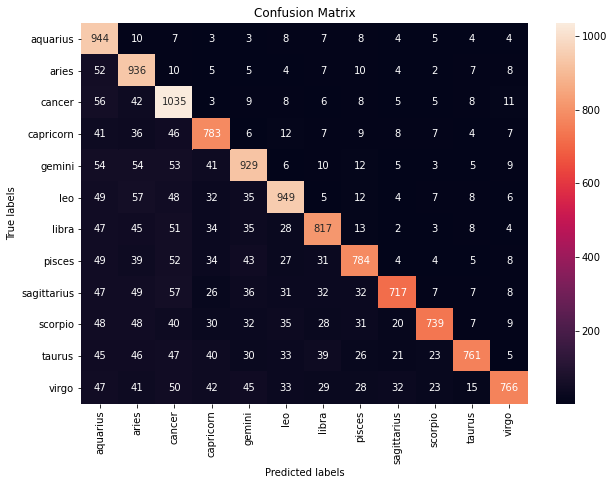

In [53]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

In [54]:
#Deep of tree
decision_tree_model.get_depth()

59

#### Decision trees have the best score but have the defect of over-fitting. To fix this we will use cross-validation.

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(decision_tree_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)

[0.08165591 0.08773262 0.09004559 0.08016717 0.08396657]


### The decision tree model will be made it again, but with a max_depth of 30 to stop the algorithm from reaching the stopping point. The new accuracy rate of ~57% is worse than the first iteration, but slightly better than the KNN model.

In [56]:
cart_model30 = DecisionTreeClassifier(max_depth = 30).fit(X_train, Y_train) 
cart_predictions30 = cart_model30.predict(X_train) 

In [57]:
print(classification_report(Y_train, cart_predictions30))

              precision    recall  f1-score   support

    aquarius       0.59      0.66      0.62      1007
       aries       0.55      0.65      0.59      1050
      cancer       0.53      0.64      0.58      1196
   capricorn       0.70      0.56      0.62       966
      gemini       0.54      0.57      0.56      1181
         leo       0.50      0.62      0.55      1212
       libra       0.73      0.55      0.63      1087
      pisces       0.67      0.51      0.58      1080
 sagittarius       0.77      0.49      0.60      1049
     scorpio       0.62      0.52      0.57      1067
      taurus       0.68      0.52      0.59      1116
       virgo       0.37      0.58      0.45      1151

    accuracy                           0.57     13162
   macro avg       0.60      0.57      0.58     13162
weighted avg       0.60      0.57      0.58     13162



In [58]:
results30 = cross_val_score(cart_model30, X_train, Y_train, cv=kfold, scoring='accuracy')
print(results30)

[0.09077098 0.0892518  0.08510638 0.08016717 0.08738602]


#### The score is still bad, to compensate for this over-adjustment we will use random forests.

In [59]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 42)
forest.fit(X_train, Y_train)
prediction = forest.predict(X_train)
print(classification_report(Y_train, prediction))

              precision    recall  f1-score   support

    aquarius       0.80      0.77      0.79      1007
       aries       0.77      0.78      0.77      1050
      cancer       0.76      0.79      0.77      1196
   capricorn       0.77      0.75      0.76       966
      gemini       0.78      0.76      0.77      1181
         leo       0.79      0.80      0.79      1212
       libra       0.77      0.77      0.77      1087
      pisces       0.75      0.77      0.76      1080
 sagittarius       0.78      0.74      0.76      1049
     scorpio       0.79      0.76      0.78      1067
      taurus       0.80      0.77      0.78      1116
       virgo       0.73      0.79      0.76      1151

    accuracy                           0.77     13162
   macro avg       0.77      0.77      0.77     13162
weighted avg       0.77      0.77      0.77     13162



In [60]:
print(f"Score training data : {forest.score(X_train, Y_train)}")
print(f"Score test data : {forest.score(X_test, Y_test)}")

Score training data : 0.7719191612216988
Score test data : 0.08751139471285324


#### Let us now use cross-validation.

In [61]:
results = cross_val_score(forest, X_train, Y_train, cv=kfold, scoring='accuracy')
print(results)

[0.08507406 0.07975693 0.09308511 0.07674772 0.08206687]


#### Final model : 
We will use decision trees, because they provide the best results.

In [62]:
knn_predictionsVal = knn_model.predict(X_test) 
print(classification_report(Y_test, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.08      0.18      0.11       255
       aries       0.09      0.16      0.11       278
      cancer       0.09      0.16      0.11       261
   capricorn       0.07      0.08      0.08       231
      gemini       0.08      0.07      0.07       315
         leo       0.08      0.05      0.06       304
       libra       0.10      0.06      0.07       267
      pisces       0.06      0.05      0.05       254
 sagittarius       0.05      0.02      0.03       263
     scorpio       0.08      0.04      0.06       289
      taurus       0.07      0.04      0.05       274
       virgo       0.12      0.07      0.09       300

    accuracy                           0.08      3291
   macro avg       0.08      0.08      0.08      3291
weighted avg       0.08      0.08      0.07      3291



In the confusion matrix, it becomes clear that Cancer, Gemini, Leo, and Virgo was predicted most often, but was not super accurate since the vertical color band represents even distributed guesses mostly wrong and some correct.

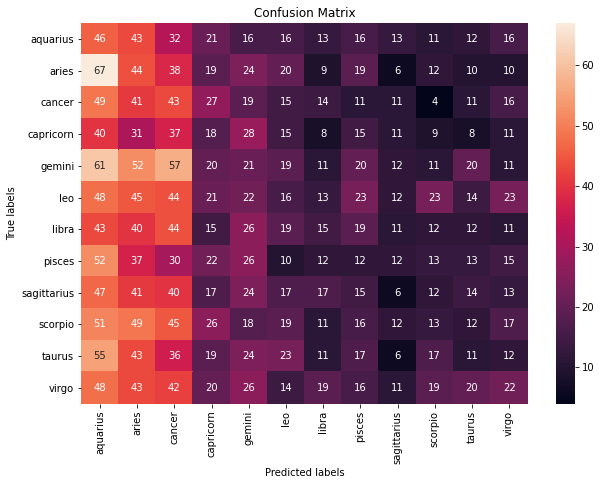

In [65]:
final_cm = confusion_matrix(Y_test, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);

### Conclusions :
The aim of the project was to predict the astrological signs of OkCupid users. For this we used several machine learning models, but the one we chose was the decision tree because of its relatively better performance than the others.
It is necessary to note that for our study we only used a few variables. The results might have been better if we had chosen other variables or adjusted our models to make them more efficient.

### Next Steps :
If the opportunity arose to do this project again, I would use a different approach, for example in addition to having data, I would talk directly to a sample of users of the site to see how they make their choices, of course if this is possible, it could help me to get an idea of the best variables to use to make the prediction.